In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [2]:
#we are using suport vector machines (SVMs) to find out what influences black box threatment of ML algorithms

multiplec = pd.read_csv('multipleChoiceResponses.csv')

/Users/rasputin/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,2,8,10,21,23,24,25,26,27,28,44,56,64,83,85,87,107,109,123,125,150,157,172,174,194,210,218,219,223,246,249,262,264,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,304,306,325,326,329,341,368,371,384,385,389,390,391,393,394) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
mkeys=multiplec.keys()
#excludes the columns corresponding to text explaining
multiplec=multiplec.drop([ mkeys[2], mkeys[8], mkeys[10], mkeys[44], mkeys[56], mkeys[64], mkeys[83], mkeys[85], 
                       mkeys[87], mkeys[107], mkeys[109], mkeys[123],mkeys[125], mkeys[150], 
                          mkeys[194], mkeys[223], mkeys[249],mkeys[262], mkeys[264],mkeys[276],
                      mkeys[304],mkeys[306], mkeys[329], mkeys[341], mkeys[371], mkeys[385], mkeys[394]],axis=1)
multi2=multiplec.iloc[1:,:]

In [4]:
#since the first column is actually composed of integers, we do not include it in the encoding

obj_df = multi2.select_dtypes(include=['object']).copy()
obj_df = obj_df.drop([mkeys[0], mkeys[372]],axis=1)

In [5]:
#One-Hot encodes the object columns so the cathegorial variables can be passed to
#the algorithms
obj_df=pd.get_dummies(obj_df)
labels=pd.get_dummies(multi2[mkeys[372]])
encoded_data = pd.concat([multi2.iloc[:,0],obj_df,multi2.select_dtypes(exclude=['object']).copy()],axis=1)


In [6]:
#changes nan values two -1
encoded_data = encoded_data.fillna(value=-1)
encoded_data.head()

,Time from Start to Finish (seconds),Q1_Female,Q1_Male,Q1_Prefer not to say,Q1_Prefer to self-describe,Q2_18-21,Q2_22-24,Q2_25-29,Q2_30-34,Q2_35-39,...,Q49_Part_11_None/I do not make my work easy for others to reproduce,Q49_Part_12_Other,Q50_Part_1_Too expensive,Q50_Part_2_Too time-consuming,Q50_Part_3_Requires too much technical knowledge,Q50_Part_4_Afraid that others will use my work without giving proper credit,Q50_Part_5_Not enough incentives to share my work,Q50_Part_6_I had never considered making my work easier for others to reproduce,Q50_Part_7_None of these reasons apply to me,Q50_Part_8_Other
1,710,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,434,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,718,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,621,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0
5,731,0,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [7]:
#we are going to use PCA for the purpose of dimentionality reduction in order to reduce computation time
data_proj = pd.DataFrame(PCA(n_components=10).fit_transform(encoded_data))
#data_proj =encoded_data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data_proj, labels, test_size=0.33)

In [9]:
#uses a one vs rest classifier: Each class fits its own support vector machine and they compete
#with each set
classif = OneVsRestClassifier(SVC(kernel='linear'))
classif.fit(X_train, y_train)
sc=classif.score(X_test,y_test)
print('yeeet')
print(sc)

yeeet
0.5768351536703074


0
1
2
3


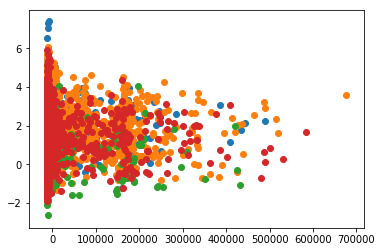

In [10]:
#plotting 
from mpl_toolkits.mplot3d import Axes3D 
n_c=4 #number of classes

for i in range(0,4):
    current=np.where(np.asarray(labels)[:, i])
    plt.scatter(np.asarray(data_proj)[current, 0], np.asarray(data_proj)[current, 1])
    print(i)


In [11]:
K_fold(7, 'rbf',data_proj, labels )

NameError: name 'K_fold' is not defined